#**La industria audiovisual en Argentina.**  

---

# **Introducción**.

## En el siguiente análisis explorativo, nos adentraremos en una de las industrias más rentables del mundo: el audiovisual. Comenzando desde el año 2005, repasaremos 15 años de historia para comprender como se comporta esta industria en nuestro país.

### En principio, los datos a investigar son los siguientes:


1.   Cantidad de peliculas estrenadas en el país. 
2.   Cantidad de espectadores (por provincia argentina).
3.   Recaudaciones.

### Tomando la exploración bajo las siguientes dimensiones:


*   Tipo de estreno (Nacional- Extranjero)
*   Recaudación por tipo de film.
*   Provincias con mayor y menor cantidad de espectadores.
*   Máxima cantidad de espectadores y año al que corresponde la cifra (por provinca argentina).
*   Mínima cantidad de espectadores y año al que corresponde la cifra (por provincia argentina)
*   Cantidad de espectadores por año.
*   Recaudación de cada provincia argentina.
*   Provincia con mayor recaudación.
*   Provincia con menor recaudación.
*   Año con la mayor recaudación a nivel nacional.

### Por último, realizaremos un breve repaso del impacto del COVID dentro de la industria audiovisual.

 






---

In [ ]:
##Comenzamos importando las librerías que se utilizarán a lo largo del análisis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# **1. Importación de los datos.**

#Aclaraciones.

### Los datos utilizados son de uso público y fueron extraídos de [Datos argentina](https://www.datos.gob.ar/). Se utilizarán cuatro data sets con diversos datos acerca de la recaudación, número de estrenos y espectadores de los cines argentinos.

In [ ]:
##Importamos los datos

##Cantidad de películas nacionales y extranjeras estrenadas
estrenos= pd.read_csv("a03_estrenos_de_cine_por_origen_film.csv")

##Recaudación de los estrenos
#recaudación_por_origen= pd.read_csv("a02_recaudacion_de_cine_nivel_nacional_por_origen_de_film.csv")

##Cantidad de espectadores en cada provincia
#cant_espectadores_provincias=pd.read_csv("a04_espectadores_de_cine_nivel_provincial.csv")

##Reaudación por provincia
#recau_espectadores_prov= pd.read_csv("a05_recaudacion_de_cine_nivel_provincial.csv")






# **2. Limpieza de los datos.**

## 2.1. SET: 'Estrenos'.

In [ ]:
##Comenzamos revisando el set:
estrenos.info()
estrenos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   indice_tiempo             27 non-null     object 
 1   estrenos_cine_total       27 non-null     int64  
 2   estrenos_film_nacional    20 non-null     float64
 3   estrenos_film_extranjero  20 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 992.0+ bytes


,indice_tiempo,estrenos_cine_total,estrenos_film_nacional,estrenos_film_extranjero
0,1994-01-01,171,NaN,NaN
1,1995-01-01,178,NaN,NaN
2,1996-01-01,178,NaN,NaN
3,1997-01-01,172,NaN,NaN
4,1998-01-01,214,NaN,NaN
5,1999-01-01,257,NaN,NaN
6,2000-01-01,254,NaN,NaN
7,2001-01-01,228,48.0,180.0
8,2002-01-01,207,42.0,165.0
9,2003-01-01,213,48.0,165.0


In [ ]:
'''El set de estrenos tiene cuatro columnas: Indice de tiempo, estrenos totales, estrenos nacionales 
y estrenos extranjeros.

Observamos que cada columna debería tener un total de 27 entradas, pero en las columnas estrenos nacionales y estrenos
extranjeros el número de entradas not null es de 20, lo que significa que hay 7 valores faltantes en cada una,
por lo que llenaremos esos espacios con el valor 0.

'''
estrenos= estrenos.fillna(0)

'''
Continuamos con la revisión y vemos que las columnas tiene distintos tipos de datos y esto podría ser un problema 
en el futuro, para resolverlo, cambiaremos los tipos para que todos sean números enteros.
'''

for column in estrenos.columns:
    if estrenos[column].dtype== 'float64':
        estrenos[column]=estrenos[column].astype('int64')

        
'''
Una vez completos estos pasos, revisamos el set:
'''
estrenos


,indice_tiempo,estrenos_cine_total,estrenos_film_nacional,estrenos_film_extranjero
0,1994-01-01,171,0,0
1,1995-01-01,178,0,0
2,1996-01-01,178,0,0
3,1997-01-01,172,0,0
4,1998-01-01,214,0,0
5,1999-01-01,257,0,0
6,2000-01-01,254,0,0
7,2001-01-01,228,48,180
8,2002-01-01,207,42,165
9,2003-01-01,213,48,165


In [ ]:
'''
Continuando con la revisión, notamos que nuestro análisis solo cubrirá los últimos 15 años, por lo que todos los datos
anteriores no serán de utilidad, así que procedemos a descartarlos:
'''
estrenos.drop(estrenos.index[0:11], inplace=True)

'''
Además, observamos que la columna de indice de tiempo no está en el formato que usaremos. Para corregir esto
convertimos la columna a datatime y dejamos solo el año:
'''

estrenos['indice_tiempo']= pd.to_datetime(estrenos['indice_tiempo'], format= '%Y-%m-%d')

estrenos['indice_tiempo']=estrenos['indice_tiempo'].dt.strftime('%Y')


'''
Por último re-nombramos las columnas y fomateamos el index del data frame:
'''
estrenos.rename(columns= {'indice_tiempo': 'Año', 'estrenos_cine_total': 'Total de estrenos', 
                'estrenos_film_nacional':'Films nacionales', 'estrenos_film_extranjero':'Films extranjeros'}, inplace=True)
estrenos.set_index('Año', inplace= True)
'''

Revisamos el set para comprobar que los cambios sean correctos:
'''




'\n\nRevisamos el set para comprobar que los cambios sean correctos:\n'

In [ ]:
estrenos

,Total de estrenos,Films nacionales,Films extranjeros
Año,,,
2005,228,58,170
2006,264,72,192
2007,292,100,192
2008,286,72,214
2009,293,87,206
2010,350,130,220
2011,348,133,215
2012,336,146,190
2013,386,168,218


## 2.2. SET: 'Reacudación por origen del film'.

In [ ]:
'''
Comenzamos revisando el set:
'''
recaudación_por_origen.info()
recaudación_por_origen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   indice_tiempo                      24 non-null     object 
 1   recaudacion_cine                   24 non-null     int64  
 2   recaudacion_films_nacionales       20 non-null     float64
 3   recaudacion_films_extranjeros      20 non-null     float64
 4   recaudacion_festivales_y_muestras  20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


,indice_tiempo,recaudacion_cine,recaudacion_films_nacionales,recaudacion_films_extranjeros,recaudacion_festivales_y_muestras
0,1997-01-01,130486630,NaN,NaN,NaN
1,1998-01-01,146659802,NaN,NaN,NaN
2,1999-01-01,151699783,NaN,NaN,NaN
3,2000-01-01,164953455,NaN,NaN,NaN
4,2001-01-01,134668998,17351255.0,1.164046e+08,913129.0
5,2002-01-01,148980501,15749247.0,1.321589e+08,1072388.0
6,2003-01-01,184001012,17122843.0,1.653224e+08,1555760.0
7,2004-01-01,264809740,34015793.0,2.288033e+08,1990601.0
8,2005-01-01,248428757,29099427.0,2.172674e+08,2061895.0
9,2006-01-01,282501187,30978187.0,2.480999e+08,3423072.0


In [ ]:
'''
Para comenzar, pasaremos la fecha al formato que utilizaremos y re-nombraremos las columnas:
'''
recaudación_por_origen['indice_tiempo']=pd.to_datetime(recaudación_por_origen['indice_tiempo'], format= '%Y-%m-%d')
recaudación_por_origen['indice_tiempo']=recaudación_por_origen['indice_tiempo'].dt.strftime('%Y')

recaudación_por_origen.rename(columns={'indice_tiempo':'Año','recaudacion_cine':'Recaudación total', 'recaudacion_films_nacionales':'Films nacionales',
                              'recaudacion_films_extranjeros':'Films extranjeros','recaudacion_festivales_y_muestras':'Festivales y muestras'}, inplace=True)

'''
Continuamos revisando el tipo de dato de cada columna, dos de ellas están en float y una en int. Sin embargo, la columna
de recaudación de films extranjeros nos llama la atención de inmediato ya que sus datos están en un formato distinto.
Está columna está en notación científica, así comenzaremos a formatear los datos por está columna y cambiaremos el tipo de
la columna de "Recaudación total", comenzamos dejamos todos los datos en int:
'''



'\nContinuamos revisando el tipo de dato de cada columna, dos de ellas están en float y una en int. Sin embargo, la columna\nde recaudación de films extranjeros nos llama la atención de inmediato ya que sus datos están en un formato distinto.\nEstá columna está en notación científica, así comenzaremos a formatear los datos por está columna y cambiaremos el tipo de\nla columna de "Recaudación total", dejando todos los datos en float:\n'

In [ ]:
'''
Llevamos los valores nan a 0 para evitar problemas:
'''

recaudación_por_origen= recaudación_por_origen.fillna(0)

'''
Esto es innecesario después hay que borrarlo, solo convertir la columna int y la de notacion cientifica.
'''
for column in recaudación_por_origen.columns:
    if recaudación_por_origen[column].dtype == "float64":
        recaudación_por_origen[column]= recaudación_por_origen[column].astype("int64")

In [ ]:
'''
Convertimos los valores de las columnas en millones, esto vuelve a convertir los datos en float:
'''
recaudación_por_origen['Festivales y muestras']= (recaudación_por_origen['Festivales y muestras']/1000000).round(3)

In [ ]:
#Calculamos las columnas restantes:
recaudación_por_origen['Films nacionales']=(recaudación_por_origen['Films nacionales']/1000000).round(3)
recaudación_por_origen['Films extranjeros']=(recaudación_por_origen['Films extranjeros']/1000000).round(3)
recaudación_por_origen['Recaudación total']=(recaudación_por_origen['Recaudación total']/1000000).round(3)


In [ ]:
'''
Por último, eliminamos las columnas que no vamos a utilizar y cambiamos el index del dataframe:
'''
#Columnas eliminadas
recaudación_por_origen.drop(estrenos.index[0:8], inplace=True)


In [ ]:
#Cambio de index:
recaudación_por_origen.set_index('Año', inplace=True)

## 2.3. SET: 'Cantidad de espectadores por provincia'.

In [ ]:
'''
Revisamos el sset:
'''
cant_espectadores_provincias.info()
cant_espetadores_provincias.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   indice_tiempo   20 non-null     object
 1   espect_cine_2   20 non-null     int64 
 2   espect_cine_6   20 non-null     int64 
 3   espect_cine_10  20 non-null     int64 
 4   espect_cine_14  20 non-null     int64 
 5   espect_cine_18  20 non-null     int64 
 6   espect_cine_22  20 non-null     int64 
 7   espect_cine_26  20 non-null     int64 
 8   espect_cine_30  20 non-null     int64 
 9   espect_cine_34  20 non-null     int64 
 10  espect_cine_38  20 non-null     int64 
 11  espect_cine_42  20 non-null     int64 
 12  espect_cine_46  20 non-null     int64 
 13  espect_cine_50  20 non-null     int64 
 14  espect_cine_54  20 non-null     int64 
 15  espect_cine_58  20 non-null     int64 
 16  espect_cine_62  20 non-null     int64 
 17  espect_cine_66  20 non-null     int64 
 18  espect_cine_

In [ ]:
'''
Primero le asignamos los nombres correspondientes a las columnas:
'''
cant_espectadores_provincias.rename(columns= {'indice_tiempo': 'Año','espect_cine_2': 'Ciudad Autónoma de Bs. As.','espect_cine_6': 'Buenos Aires', 'espect_cine_10':'Catamarca', 'espect_cine_14':'Córdoba',
                                  'espect_cine_18':'Corrientes', 'espect_cine_22':'Chaco', 'espect_cine_26':'Chubut', 'espect_cine_30':'Entre Ríos',
                                  'espect_cine_34':'Formosa', 'espect_cine_38': 'Jujuy', 'espect_cine_42':'La Pampa','espect_cine_46':'La Rioja', 'espect_cine_50':'Mendoza',
                                  'espect_cine_54':'Misiones','espect_cine_58':'Neuquén','espect_cine_62':'Río Negro','espect_cine_66':'Salta','espect_cine_70':'San Juan',
                                  'espect_cine_74':'San Luis','espect_cine_78':'Santa Cruz','espect_cine_82':'Santa Fe','espect_cine_86':'Santiago del Estero','espect_cine_90':'Tucumán',
                                  'espect_cine_94':'Tierra del Fuego, Antártida e Islas del Atlántico Sur'}, inplace= True)


In [ ]:
'''
Todos los datos están en su tipo correspondiente a exepción de la columna de indíce de tiempo, la cual pasaremos 
a formato que usaremos:
'''
cant_espectadores_provincias['Año']= pd.to_datetime(cant_espectadores_provincias['Año'], format= '%Y-%m-%d')
cant_espectadores_provincias['Año']=cant_espectadores_provincias['Año'].dt.strftime('%Y')

'''
Por último, dejamos solo los años que cubriremos y cambiamos el index:
'''
cant_espectadores_provincias.drop(cant_espectadores_provincias.index[0:4], inplace=True)
cant_espectadores_provincias.set_index('Año', inplace=True)


In [ ]:
'''
Revisamos que los cambios hayan sido correctos:
'''
cant_espectadores_provincias

,Ciudad Autónoma de Bs. As.,Buenos Aires,Catamarca,Córdoba,Corrientes,Chaco,Chubut,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tucumán,"Tierra del Fuego, Antártida e Islas del Atlántico Sur"
Año,,,,,,,,,,,,,,,,,,,,,
2005,11592194,14332805,182697,3523958,232454,112196,331082,88756,6014,76105,...,565533,242867,589341,347027,295491,78293,2882453,235778,119588,359124
2006,10823683,13727980,158192,3325049,225802,109867,342453,81342,4384,76148,...,529989,237106,487852,311805,274085,89193,3014356,233710,146167,317076
2007,10176667,13270625,166646,3137684,256023,105056,314790,79837,8437,102325,...,525181,183653,518159,262763,217746,37323,2821784,194418,159985,323390
2008,9922874,12919859,176575,3196671,377895,121389,268587,67170,511,81117,...,501577,132215,512247,242116,252151,42390,2768802,193298,146512,455089
2009,9196314,12920146,134704,3048473,372776,184894,243848,33770,12791,66202,...,521095,136258,504678,179473,189263,45105,2801017,164386,121758,502557
2010,10556993,15062115,105011,3584703,427762,250845,304755,33994,54487,107919,...,611157,98250,662694,130584,200822,68777,3215679,317237,93047,674419
2011,11140907,17084448,382300,3793280,495204,316338,445284,69577,30557,147343,...,715321,47991,840156,205113,314282,94377,3386123,210205,240298,639963
2012,11664622,18994049,213862,4152413,512545,299410,418875,88069,101417,160252,...,692442,183219,846432,366063,342879,79349,3842569,208808,217325,755617
2013,11210616,19516694,253441,4198853,552531,328170,399041,107269,57377,175892,...,765255,197875,851330,502525,366681,112674,4010062,289287,267819,937485


## 2.4. SET: 'Recaudación por provincia'.

In [ ]:
'''
Revisamos el set:
'''
recau_espectadores_prov.info()
recau_espectadores_prov.head()


,indice_tiempo,recaud_cine_caba_02,recaud_cine_buenos_aires_06,recaud_cine_catamarca_10,recaud_cine_chaco_22,recaud_cine_chubut_26,recaud_cine_cordoba_14,recaud_cine_corrientes_18,recaud_cine_entre_rios_30,recaud_cine_formosa_34,...,recaud_cine_neuquen_58,recaud_cine_rio_negro_62,recaud_cine_salta_66,recaud_cine_san_juan_70,recaud_cine_san_luis_74,recaud_cine_santa_cruz_78,recaud_cine_santa_fe_82,recaud_cine_sgo_del_estero_86,recaud_cine_tierra_del_fuego_90,recaud_cine_tucuman_94
0,2001-01-01,51137876,57722874,1370,300,929579,7302765,NaN,50133,NaN,...,1968915,321826,1363050,10240.0,2321,195653,7699325,976,500102,527986
1,2002-01-01,54879311,62795827,384181,228030,1007748,9260330,6444.0,100507,3677.0,...,2018393,460467,1605256,NaN,534767,131935,8278549,414118,476986,1075435
2,2003-01-01,65720770,76129947,711010,336821,1341666,12085267,473143.0,247009,6143.0,...,3052669,422255,2105848,173972.0,983785,268633,10215069,732798,493355,1366044
3,2004-01-01,90553579,108417315,1073498,504638,2498293,17961825,817177.0,479533,19401.0,...,4522413,640001,3393595,657961.0,1560560,571266,15927008,1304461,830548,2153584
4,2005-01-01,86900681,97929882,1041036,524423,2339417,18425393,643800.0,224678,18703.0,...,3572605,901930,3044056,641350.0,1522625,230879,17334628,1262196,649358,1862017


In [ ]:
'''
Primero, moficamos los valores de las columnas para que nos muestre la cantidad recaudada en millones:
'''
recau_espectadores_prov= recau_espectadores_prov.fillna(0)

for column in recau_espectadores_prov.columns:
    if column == 'indice_tiempo':
        continue
    else:
        recau_espectadores_prov[column]= (recau_espectadores_prov[column]/1000000).round(2)

In [ ]:
'''
Después, modificando los nombres de las columnas:
'''
recau_espectadores_prov.rename(columns={'indice_tiempo':'Año','recaud_cine_caba_02':'Cuidad Autónoma de Bs. As.','recaud_cine_buenos_aires_06':'Buenos Aires','recaud_cine_catamarca_10':'Catamarca','recaud_cine_chaco_22':'Chaco','recaud_cine_chubut_26':'Chubut','recaud_cine_cordoba_14':'Córdoba',
                               'recaud_cine_corrientes_18':'Corrientes','recaud_cine_entre_rios_30':'Entre Rios','recaud_cine_formosa_34':'Formosa','recaud_cine_jujuy_38':'Jujuy','recaud_cine_la_pampa_42':'La Pampa','recaud_cine_la_rioja_46':'La Rioja','recaud_cine_mendoza_50':'Mendoza',
                               'recaud_cine_misiones_54':'Misiones','recaud_cine_neuquen_58':'Neuquén','recaud_cine_rio_negro_62':'Río Negro','recaud_cine_salta_66':'Salta','recaud_cine_san_juan_70':'San Juan','recaud_cine_san_luis_74':'San Luis','recaud_cine_santa_cruz_78':'Santa Cruz',
                               'recaud_cine_santa_fe_82':'Santa Fe','recaud_cine_sgo_del_estero_86':'Santiago del Estero','recaud_cine_tucuman_94':'Tucumán','recaud_cine_tierra_del_fuego_90':'Tierra del Fuego, Antártida e Islas del Atlántico Sur'}, inplace=True)

In [ ]:
'''
Continuamos, modificando la columna de año para sacar el mes y el día de las filas:
'''
recau_espectadores_prov['Año']=pd.to_datetime(recau_espectadores_prov['Año'], format= '%Y-%m-%d')
recau_espectadores_prov['Año']= recau_espectadores_prov['Año'].dt.strftime('%Y')


In [ ]:
'''
Por último, dejamos solo los años que nos interesan y formateamos el index:
'''
recau_espectadores_prov.drop(recau_espectadores_prov.index[0:4], inplace= True)
recau_espectadores_prov.set_index('Año', inplace=True)

In [ ]:
#Revisamos los cambios.
recau_espectadores_prov


,Cuidad Autónoma de Bs. As.,Buenos Aires,Catamarca,Chaco,Chubut,Córdoba,Corrientes,Entre Rios,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,"Tierra del Fuego, Antártida e Islas del Atlántico Sur",Tucumán
Año,,,,,,,,,,,,,,,,,,,,,
2005,86.90,97.93,1.04,0.52,2.34,18.43,0.64,0.22,0.02,0.26,...,3.57,0.90,3.04,0.64,1.52,0.23,17.33,1.26,0.65,1.86
2006,98.74,110.54,0.99,0.61,2.96,21.23,0.85,0.10,0.01,0.43,...,4.14,0.69,3.45,0.54,1.58,0.29,20.88,1.46,0.89,2.13
2007,110.12,130.40,1.22,0.62,3.07,23.74,1.25,0.18,0.03,0.67,...,5.00,1.50,4.15,0.62,1.70,0.32,23.28,1.48,1.03,2.04
2008,130.12,162.27,1.43,0.97,2.78,29.53,2.18,0.22,0.01,0.60,...,6.35,1.00,5.45,1.27,2.07,0.40,27.48,1.16,1.34,3.40
2009,142.68,187.31,1.67,2.13,3.83,38.07,2.91,0.46,0.12,0.70,...,7.83,0.87,6.26,1.62,2.56,0.54,36.90,1.94,1.49,3.50
2010,184.24,290.37,2.28,3.31,5.14,52.00,4.66,0.65,0.71,1.32,...,11.58,1.06,9.91,1.68,4.25,0.85,52.05,2.91,3.30,8.62
2011,247.66,412.55,4.60,6.08,9.73,76.16,7.88,1.31,1.31,2.67,...,18.37,0.74,15.97,6.86,6.59,1.30,76.33,2.38,4.89,10.54
2012,321.57,563.60,5.57,7.98,13.36,106.16,10.08,1.94,2.15,3.04,...,24.46,4.11,21.87,9.46,8.36,1.42,98.12,3.39,5.99,16.27
2013,392.00,726.96,7.51,9.39,14.90,136.86,13.23,5.92,1.81,4.18,...,35.90,5.68,26.84,15.29,10.33,2.37,136.12,7.01,8.73,24.79


# **3. Exploración de los datos.**



## 3.1. Estrenos.

Text(0.5, 0, 'Año')

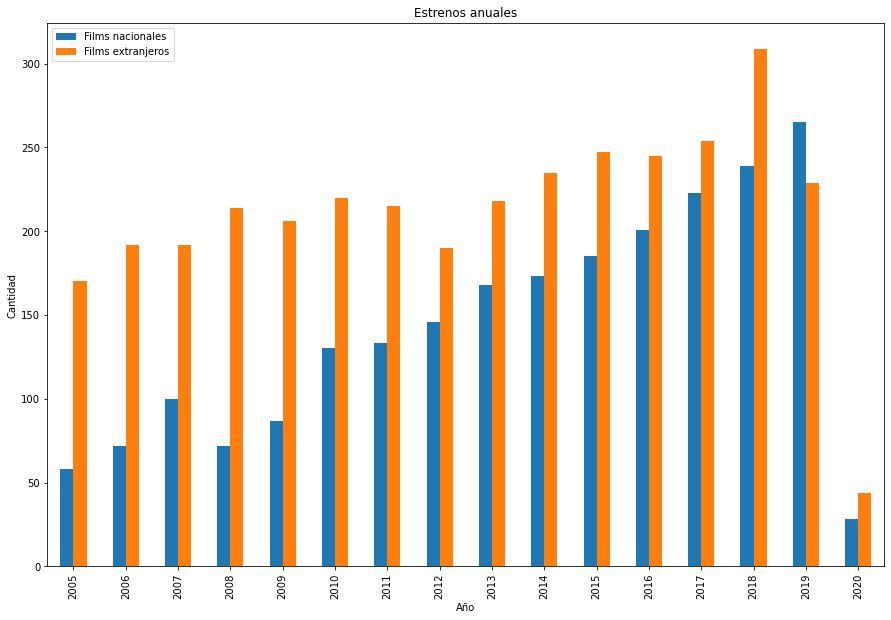

In [ ]:
#Comparamos, año a año, la diferencia entre la cantidad de estrenos nacionales y extranjeros.
#Creamos un gráfico de barras:
estrenos[['Films nacionales','Films extranjeros']].plot(kind= 'bar', figsize= (15,10))
plt.title('Estrenos anuales')
plt.ylabel('Películas estrenadas')
plt.xlabel('Año')


In [ ]:
## Calculamos año a año cual es fue el porcetaje de películas estrenadas:
estrenos['Porcentaje Films nacionales']=((estrenos['Films nacionales']*100)/ estrenos['Total de estrenos']).round(2)
estrenos['Porcentaje Films exranjeros']=((estrenos['Films extranjeros']*100)/estrenos['Total de estrenos']).round(2)
    

    

In [ ]:
estrenos

,Total de estrenos,Films nacionales,Films extranjeros,Porcentaje Films nacionales,Porcentaje Films exranjeros
Año,,,,,
2005,228,58,170,25.44,74.56
2006,264,72,192,27.27,72.73
2007,292,100,192,34.25,65.75
2008,286,72,214,25.17,74.83
2009,293,87,206,29.69,70.31
2010,350,130,220,37.14,62.86
2011,348,133,215,38.22,61.78
2012,336,146,190,43.45,56.55
2013,386,168,218,43.52,56.48


In [ ]:
### Calculamos cuantas peliculas se estrenaron en los últimos 15 años:
total_estrenos= estrenos['Total de estrenos'].sum()
total_films_nacionales= estrenos['Films nacionales'].sum()
total_films_extranjeros= estrenos ['Films extranjeros'].sum()

print('Estrenos totales: {}'.format (total_estrenos))
print('Estrenos nacionales: {}'.format (total_films_nacionales))
print('Estrenos extranjeros: {}'.format(total_films_extranjeros))

###Calculamos los totales en porcentajes:
porc_nacionales= (total_films_nacionales * 100)/total_estrenos
porc_extranjeros= (total_films_extranjeros *100)/total_estrenos

print('Porcentaje de películas nacionales: {} %'. format (porc_nacionales.round(2)))
print('Porentaaje de películas extranjeras: {} %'. format (porc_extranjeros.round(2)))

Estrenos totales: 5660
Estrenos nacionales: 2280
Estrenos extranjeros: 3380
Porcentaje de películas nacionales: 40.28 %
Porentaaje de películas extranjeras: 59.72 %


> Los estrenos extranjeros superaron a los estrenos nacionales en un 20% (aproximadamente).  El máximo de películas extranjeras estrenadas en un año fue de 309 películas en el año 2018, mientras que para los films nacionales fue de 265 en el año 2019. Casualmente, este fue el único año en el que los estrenos nacionales superaron a los extranjeros con una diferencia de 36 películas más.

## 3.2. Recaudaciones por origen del film.

In [ ]:
# Revisamos el set a utilizar:
recaudación_por_origen.set_index('Año', inplace=True)
recaudación_por_origen

,Recaudación total,Films nacionales,Films extranjeros,Festivales y muestras
Año,,,,
2005,248.429,29.099,217.267,2.062
2006,282.501,30.978,248.100,3.423
2007,325.045,29.823,290.853,4.369
2008,395.573,46.245,343.071,6.256
2009,461.566,71.938,381.902,7.726
2010,670.725,56.857,600.273,13.596
2011,959.727,63.380,884.547,11.800
2012,1297.371,113.641,1166.109,17.621
2013,1683.374,243.487,1425.446,14.441


Text(0.5, 0, 'Año')

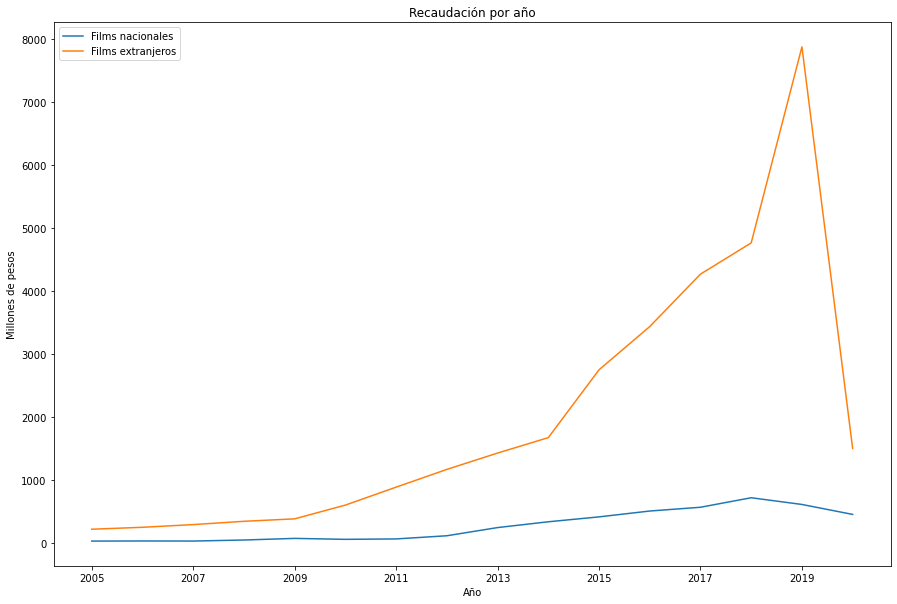

In [ ]:
#Creamos un gráfico para visualizar las diferencias entre lo recaudado.
recaudación_por_origen[['Films nacionales', 'Films extranjeros']].plot(kind='line', figsize=(15,10))
plt.title('Recaudación por año')
plt.ylabel('Millones de pesos')
plt.xlabel('Año')

In [ ]:
# Calculamos cuanto ha recaudado el INCAA en los últimos 15 años:
total_recaudación= recaudación_por_origen['Recaudación total'].sum().round(3)
total_recaudación_nacionales=recaudación_por_origen['Films nacionales'].sum()
total_recaudación_extranjeros= recaudación_por_origen['Films extranjeros'].sum()

print('Total recaudado: ${} Millones'.format(total_recaudación))
print('Recaudación de films nacionale: ${} Millones'.format(total_recaudación_nacionales))
print('Recaudación de films extranjeros: $ {} Millones'.format(total_recaudación_extranjeros))


Total recaudado: $36297.899
Recaudación de films nacionale: $4285.234
Recaudación de films extranjeros: $ 31796.205
En total el: 11.81 % de lo recaudado fue de películas nacionales
En total el: 87.6 % de lo recaudado fue de películas extranjeras


> En total durante los últimos quince años se recaudaron al rededor de 36 billones de pesos. Sin embargo, solo 4 billones corresponden a dinero generado por películas nacionales. 

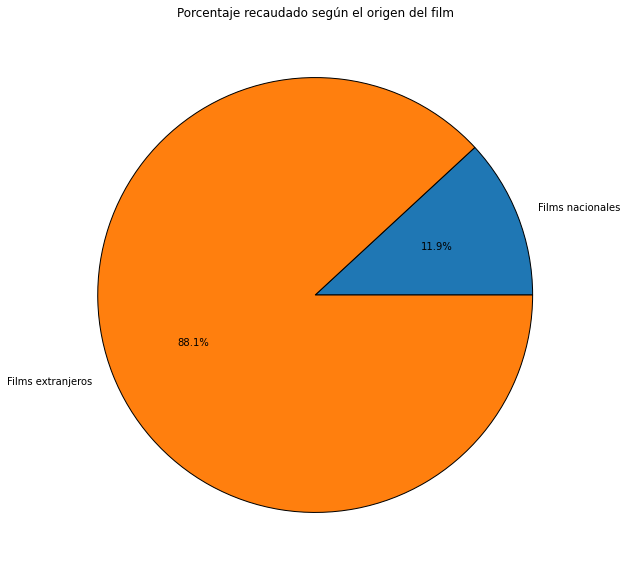

In [ ]:
#Graficamos la diferencia entre las recaudacíones:
totales=[total_recaudación_nacionales, total_recaudación_extranjeros]
nombres=['Films nacionales', 'Films extranjeros']
plt.figure(figsize=(10,10))
plt.pie(totales, labels= nombres, autopct="%.1f%%", wedgeprops={'edgecolor':'black'})
plt.title('Porcentaje recaudado según el origen del film')
plt.show()

> Como ya habíamos mencionado antes el único año en el que los estrenos nacionales superaron a los extranjeros fue el año 2019, sin embargo, la diferencia entre las recaudaciones es abismal. Mientras que las peliculas nacionales recaudaron 610 millones, los films extranjeros llegaron a los 7.8 billones de pesos.

Text(0.5, 0, 'Millones de pesos')

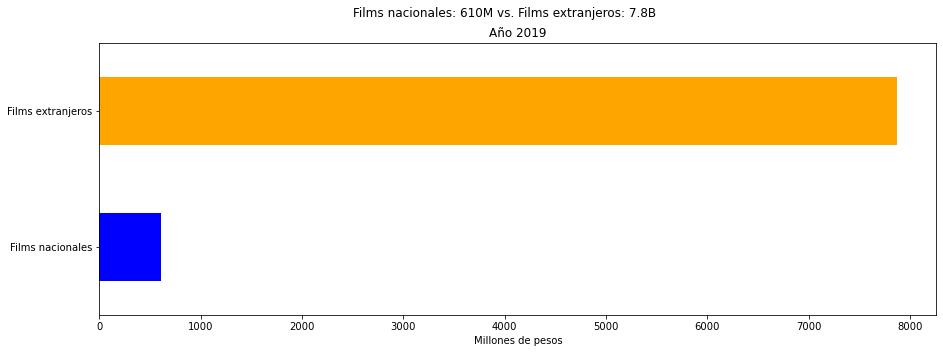

In [ ]:
#Graficamos las diferencias del año 2019.
colors=['Blue', 'Orange']
gra= recaudación_por_origen.iloc[-2, [1,2]].plot(kind='barh', figsize=(15,5), color=colors)
plt.title('Año 2019')
plt.suptitle(('Films nacionales: 610M vs. Films extranjeros: 7.8B'), y=0.98)
plt.xlabel('Millones de pesos')


## 3.3. Cantidad de espectadores por provincia.

In [ ]:
cant_espectadores_provincias

,Ciudad Autónoma de Bs. As.,Buenos Aires,Catamarca,Córdoba,Corrientes,Chaco,Chubut,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tucumán,"Tierra del Fuego, Antártida e Islas del Atlántico Sur"
Año,,,,,,,,,,,,,,,,,,,,,
2005,11592194,14332805,182697,3523958,232454,112196,331082,88756,6014,76105,...,565533,242867,589341,347027,295491,78293,2882453,235778,119588,359124
2006,10823683,13727980,158192,3325049,225802,109867,342453,81342,4384,76148,...,529989,237106,487852,311805,274085,89193,3014356,233710,146167,317076
2007,10176667,13270625,166646,3137684,256023,105056,314790,79837,8437,102325,...,525181,183653,518159,262763,217746,37323,2821784,194418,159985,323390
2008,9922874,12919859,176575,3196671,377895,121389,268587,67170,511,81117,...,501577,132215,512247,242116,252151,42390,2768802,193298,146512,455089
2009,9196314,12920146,134704,3048473,372776,184894,243848,33770,12791,66202,...,521095,136258,504678,179473,189263,45105,2801017,164386,121758,502557
2010,10556993,15062115,105011,3584703,427762,250845,304755,33994,54487,107919,...,611157,98250,662694,130584,200822,68777,3215679,317237,93047,674419
2011,11140907,17084448,382300,3793280,495204,316338,445284,69577,30557,147343,...,715321,47991,840156,205113,314282,94377,3386123,210205,240298,639963
2012,11664622,18994049,213862,4152413,512545,299410,418875,88069,101417,160252,...,692442,183219,846432,366063,342879,79349,3842569,208808,217325,755617
2013,11210616,19516694,253441,4198853,552531,328170,399041,107269,57377,175892,...,765255,197875,851330,502525,366681,112674,4010062,289287,267819,937485


In [ ]:
#Averiguamos en que año cada provincias tuvo su mayor cantidad de espectadores:
cant_espectadores_provincias.idxmax()

Ciudad Autónoma de Bs. As.                               2015
Buenos Aires                                             2015
Catamarca                                                2011
Córdoba                                                  2015
Corrientes                                               2015
Chaco                                                    2017
Chubut                                                   2015
Entre Ríos                                               2016
Formosa                                                  2019
Jujuy                                                    2019
La Pampa                                                 2016
La Rioja                                                 2015
Mendoza                                                  2015
Misiones                                                 2017
Neuquén                                                  2019
Río Negro                                                2017
Salta   

In [ ]:
#Buscamos el máximo de espectadores de cada provincia:
cant_espectadores_provincias.max().sort_values(ascending=False)


Buenos Aires                                             21219831
Ciudad Autónoma de Bs. As.                               11677534
Córdoba                                                   4308154
Santa Fe                                                  4195045
Mendoza                                                   2364451
Neuquén                                                   1326878
Salta                                                     1176408
Tierra del Fuego, Antártida e Islas del Atlántico Sur     1071745
San Juan                                                   623007
Corrientes                                                 621941
Entre Ríos                                                 475230
Chubut                                                     473949
Chaco                                                      469674
San Luis                                                   437864
Santiago del Estero                                        394328
Catamarca 

In [ ]:
#Buscamos la pronvincias con más espectadores por cada año:
cant_espectadores_provincias.idxmax(axis='columns')

Año
2005    Buenos Aires
2006    Buenos Aires
2007    Buenos Aires
2008    Buenos Aires
2009    Buenos Aires
2010    Buenos Aires
2011    Buenos Aires
2012    Buenos Aires
2013    Buenos Aires
2014    Buenos Aires
2015    Buenos Aires
2016    Buenos Aires
2017    Buenos Aires
2018    Buenos Aires
2019    Buenos Aires
2020    Buenos Aires
dtype: object

In [ ]:
#Menos espectadores
cant_espectadores_provincias.idxmin(axis='columns')

Año
2005       Formosa
2006       Formosa
2007       Formosa
2008       Formosa
2009      La Rioja
2010      La Rioja
2011      La Rioja
2012    Santa Cruz
2013       Formosa
2014       Formosa
2015       Formosa
2016       Formosa
2017       Formosa
2018       Formosa
2019       Formosa
2020       Formosa
dtype: object

Text(0, 0.5, 'Millones de espectadores')

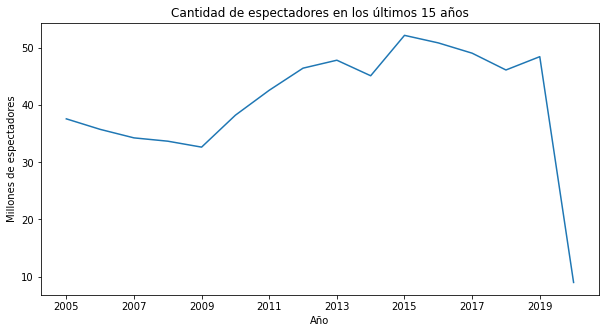

In [ ]:
#Averiguamos y graficamos cual es la cantidad de espectadores por año:
cant_espectadores_provincias['Total']=(cant_espectadores_provincias.sum(axis='columns')/1000000).round(2)
cant_espectadores_provincias['Total'].plot(kind='line', figsize=(10,5))
plt.title('Cantidad de espectadores en los últimos 15 años')
plt.ylabel('Millones de espectadores')


> La mayor cantidad de espectadores en los cines argentinos esta ubicada entre los años 2011 y 2019. La provincia con más entradas vendidas es Buenos Aires, mientras que Formosa y La Rioja son las provincias con menos ventas.   

> Por otra parte, el año con más espectadores en los cines argentinos fue el 2015, mientras que el 2020, el año de la pandemia, fue el peor año para los cines argentinos.

## 3.4. Recaudación por provincia.

Text(0.5, 0, 'Billones de pesos')

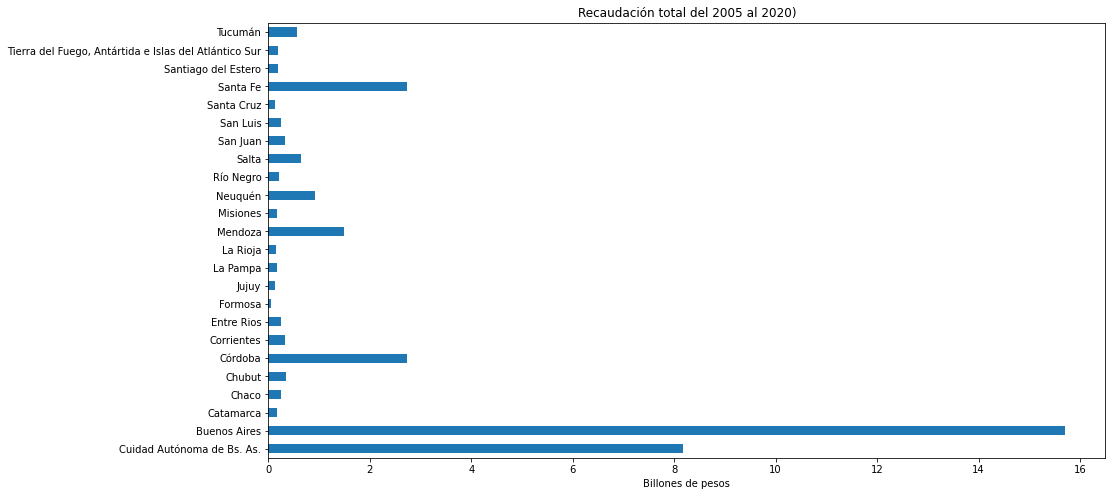

In [ ]:
#Graficamos las recaucadiones totales de cada provincia argentina.
(recau_espectadores_prov.sum()/1000).plot(kind='barh', figsize=(15,8))
plt.title('Recaudación total del 2005 al 2020')
plt.xlabel('Billones de pesos')

> El 2019 fue el año en que más se recaudó a nivel nacional, observemos el compartamiento de cada provinicia en aquel año:


In [ ]:
#Cantidad recaudada por provincia en el 2019:
#Los valores están comprendidos en millones de pesos
recau_espectadores_prov.loc['2019'].sort_values(ascending=False)

Buenos Aires                                             3679.01
Cuidad Autónoma de Bs. As.                               1820.50
Córdoba                                                   624.73
Santa Fe                                                  602.82
Mendoza                                                   363.35
Neuquén                                                   257.62
Salta                                                     166.01
Tucumán                                                   143.92
San Juan                                                   90.87
Chubut                                                     81.65
Corrientes                                                 76.20
Entre Rios                                                 68.18
Chaco                                                      61.65
San Luis                                                   61.55
Río Negro                                                  59.98
Santiago del Estero      

> Por otro lado, el 2015 fue el año con más espectadores en los cines. Veamos cuales fueron las recaudaciones en aquel momento:

In [ ]:
#Calculamos las recaudaciones proviniales en el año 2015:
recau_espectadores_prov.loc['2015'].sort_values(ascending=False)

Buenos Aires                                             1370.24
Cuidad Autónoma de Bs. As.                                678.10
Santa Fe                                                  256.62
Córdoba                                                   243.65
Mendoza                                                   143.05
Neuquén                                                    77.90
Tucumán                                                    55.32
Salta                                                      50.20
Chubut                                                     33.24
Corrientes                                                 30.39
San Juan                                                   29.39
Entre Rios                                                 26.50
San Luis                                                   23.74
Chaco                                                      18.82
Tierra del Fuego, Antártida e Islas del Atlántico Sur      17.72
La Rioja                 

In [ ]:
#Calculamos cuanto espectadores hubo en el 2015
cant_espectadores_provincias.loc['2015'].sum()

52224313

In [ ]:
#Los comparamos con la cantidad del 2019
cant_espectadores_provincias.loc['2019'].sum()

48491838

In [ ]:
#Calculamos las recaudaciones de cada año:
#2019
recau_espectadores_prov.loc['2019'].sum()

8509.77

In [ ]:
#2015
recau_espectadores_prov.loc['2015'].sum().round(2)

3174.0600000000004

*En el 2019 hubo mas de 3 millones de espectadores menos que en el 2015, sin embaro, aquel año se recaudaron casi 5 billones de pesos más.*


# **4. Impacto el COVID en la industria.**

In [ ]:
## Comenzamos con la cantidad de estrenos:
estrenos.loc[['2019','2020']]


,Total de estrenos,Films nacionales,Films extranjeros
Año,,,
2019,494,265,229
2020,72,28,44


> En tan solo un año, los estrenos cayeron en picada, dejando en cines un total de 72 estrenos.  Es decir, 422 películas menos que en el 2019.

Text(0.5, 0, 'Año')

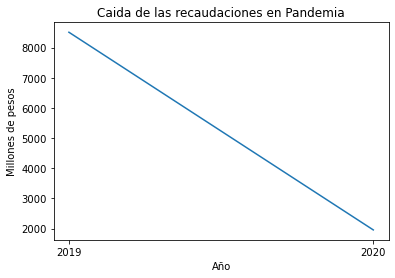

In [ ]:
#Averiguamos cuando le costo al mercado está caída:
re=recaudación_por_origen.loc[['2019', '2020']]
plt.plot(re['Recaudación total'])
plt.title('Caida de las recaudaciones en Pandemia')
plt.ylabel('Millones de pesos')
plt.xlabel('Año')

In [ ]:
## ¿Cuántos espectadores hubo el año anterior a la pandemia?
cant_espectadores_provincias.loc['2019'].sum()

48491838

In [ ]:
##¿Cuántos espectadores hubo el año que cerraron los cines por el Covid?
cant_espectadores_provincias.loc['2020'].sum()

8978139

> Esto dejo un saldo de unos 6 billones y medio menos en las recaudaciones de los cines argentinos. Esta situación está obviamente relacionada con la cantidad de personas que tuvieron la oportunidad de ver películas en las salas de cine, ya que en el 2020 hubo 40 millones de espectadores menos, debido a las restricciones del Covid.

# **5. Cierre del análisis.**

# En conclusión, la industría audiovisual en Argentina ha logrado cifras billonarias en sus recaudaciones desde el 2012, incluso en el año en el que los cines estuvieron cerrados. 

# Las provincias con más espectadores y las que más recaudan son: Buenos Aires, Santa fé, Córdoba y Mendoza. Por el otro lado, Formosa y La rioja se encuentran en el espectro contrario, con menos cantidad de recaudaciones y espectadores.